# IMBD Dataset Analysis


### Descipción de variables

Primero importé unas librerías y leí el archvio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('MoviesData.csv',
                 low_memory=False)


Lo imprimí para ver qué incluía e imprimí sus columnas

In [2]:
print(df)
print(df.columns)

      imdb_title_id                           title  \
0         tt0000009                      Miss Jerry   
1         tt0000574     The Story of the Kelly Gang   
2         tt0001892                  Den sorte drøm   
3         tt0002101                       Cleopatra   
4         tt0002130                       L'Inferno   
...             ...                             ...   
85850     tt9908390                         Le lion   
85851     tt9911196  De Beentjes van Sint-Hildegard   
85852     tt9911774       Padmavyuhathile Abhimanyu   
85853     tt9914286               Sokagin Çocuklari   
85854     tt9914942      La vida sense la Sara Amat   

                       original_title  year date_published      genre  \
0                          Miss Jerry  1894     1894-10-09    Romance   
1         The Story of the Kelly Gang  1906     12/26/1906  Biography   
2                      Den sorte drøm  1911      8/19/1911      Drama   
3                           Cleopatra  1912    

Decidí renombrar una columna y elminiar algunas otras que no iba a utilizar

In [3]:
df.rename(columns = {'avg_vote':'score'},
          inplace=True)
df.drop(['metascore', 'writer', 'date_published', 'original_title', 'description', 'actors', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'imdb_title_id'],
        axis=1,
        inplace=True)
columns = df.columns
print(columns)

Index(['title', 'year', 'genre', 'genre2', 'genre3', 'duration', 'country',
       'language', 'director', 'production_company', 'score', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')


Importé otras librerías para sacar estadísticas que describan los datos y generé estadísticas de la variable 'score' para ver cuáles eran sus características

In [4]:
import scipy.stats as stats
import seaborn as sns

score = df['score']
score=score.dropna()
scorestats = score.describe()
print(scorestats)

count    85855.000000
mean         5.898656
std          1.234987
min          1.000000
25%          5.200000
50%          6.100000
75%          6.800000
max          9.900000
Name: score, dtype: float64


De aquí, podemos interpretar que hay películas con calificaciones muy variadas, desde 1 hasta 9, pero que el 75% es menor o igual a 6.8, es decir son más las calificaciones menores a 7.0

Continué haciendo un análisis de otras variables como la de los años o "years". En esta variable fue necesario convertirla a un valor numérico antes de sacar las estadísticas: primero se extrajo el número del string utilizando expresiones regulares (regular expressions), luego se convirtió a número.

In [5]:
extr3 = df['year'].str.extract(r'(\d+)', expand=False)
df['year']=pd.to_numeric(extr3)
year = df['year']
year=year.dropna()
yearstats = year.describe()
print(yearstats)

count    85855.000000
mean      1993.500891
std         24.216420
min       1894.000000
25%       1979.000000
50%       2003.000000
75%       2013.000000
max       2020.000000
Name: year, dtype: float64


De las estadísticas de los años, podemos concluir que el 75% es mayor a 1979, es decir la mayoría de las películas de la base de datos se produjeron después de la decáda de los 80s.

### ¿Cómo ha ido cambiado la producción de películas a través de los años?

Para visualizar el comportamiento de la producción de películas a través de los años, desde 1894 hasta 2020, hice una gráfica tipo 'line plot', utilizando los ejes y valores que se obtienen al generar un histograma.

In [6]:
count, bin_edges = np.histogram(df['year'])
print(count, bin_edges)

[    2   204  1082  3781  4232  6290  8105  9483 18876 33800] [1894.  1906.6 1919.2 1931.8 1944.4 1957.  1969.6 1982.2 1994.8 2007.4
 2020. ]


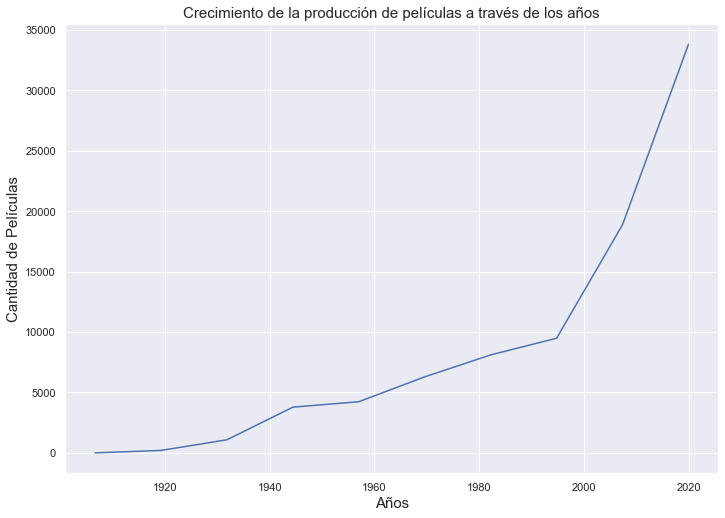

In [7]:
x = list(bin_edges)
y = list(count)

x.pop(0)
sns.set(rc={'figure.figsize':(11.7,8.27)})
growth = sns.lineplot(x,y)
growth.set_xlabel('Años', size=15)
growth.set_ylabel('Cantidad de Películas', size=15)
growth.set_title('Crecimiento de la producción de películas a través de los años', size=15)
plt.show()

##### Conclusión: Con este gráfico, podemos ver que ha habido un crecimiento exponencial en la industria del cine, sobre todo a partir de los 2000s. 

Continuamos viendo las características de algunas variables, como la de 'duration'

In [8]:
duration = df['duration']
duration = duration.dropna()
durationstats = duration.describe()
print(durationstats)

count    85855.000000
mean       100.351418
std         22.553848
min         41.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        808.000000
Name: duration, dtype: float64


Vemos que en promedio, las películas duran 100 minutos, no obstante el máximo es de 800 minutos, un número muy grande para la duración de una película.

Para ver si la variable contiene más atípicos, hice un boxplot.

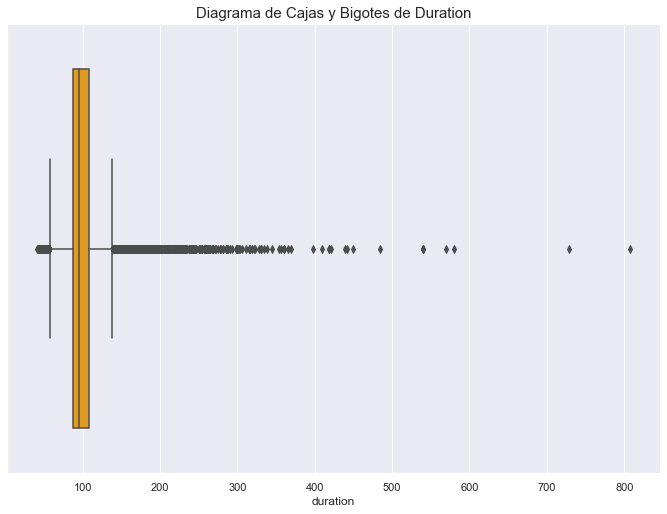

In [9]:
duracionprom = sns.boxplot(duration, color='Orange').set_title('Diagrama de Cajas y Bigotes de Duration', size=15)
plt.show()

Vemos que sí hay una gran cantidad de atípicos en esta variable, se trata de películas que duran muchas horas, la más larga dura 808 minutos, es decir, más de 13 horas.

##### Conclusion: en promedio, las películas duran alrededor de 100  minutos, es decir 1 hr 40 minutos, no obstante, hay una gran cantidad de películas que duran más de 200 minutos, es decir más de 3 horas y media, y todas estas son duraciones atípicas de películas

## Relación entre variables

Al ver los nombres de las columnas, nos podemos imaginar que existe cierta relación entre algunas de ellas.

Grafiqué la variable budget y score en un gráfico de dispersión para ver si presentaban algún comportamiento que indicara relación.

Primero, me aseguré de que ambos valores sean numéricos. 

In [10]:
print(df['budget'].dtype)
print(df['score'].dtype)


object
float64


Al ver que esto no era cierto, cambié el tipo de datos de la variable 'budget' para que fuera número.

In [11]:
extr = df['budget'].str.extract(r'(\d+)', expand=False)
df['budget']=pd.to_numeric(extr)
budget=df['budget']
budget=budget.dropna()

print(df['budget'].dtype)

float64


Una vez convertida a tipo de datos float, puedo generar la gráfica.

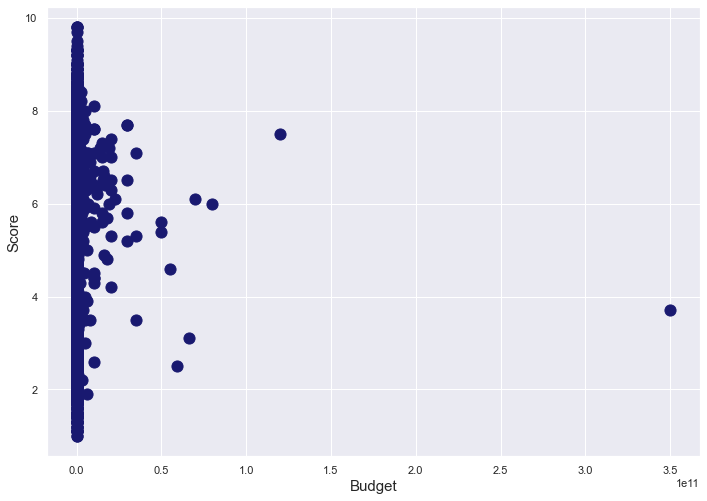

In [12]:
y=df['score'].values
x=df['budget'].values
plt.scatter(x,y,
            label='Data points',
            s=124,
           color = 'MidnightBlue')
plt.xlabel('Budget', size = 15)
plt.ylabel('Score', size=15)
plt.show()

##### De esta gráfica, podemos concluir que no parece haber relación entre estas dos variables.


Hice lo mismo con las variables: 'score' y 'usa_gross_income' para ver si encontraba una relación entre ellas.

In [13]:
print(df['usa_gross_income'].dtype)

object


In [14]:
extr2 = df['usa_gross_income'].str.extract(r'(\d+)', expand=False)
df['usa_gross_income']=pd.to_numeric(extr2)
income=df['usa_gross_income']
income=income.dropna()

print(df['usa_gross_income'].dtype)

float64


Y ya puedo graficar las dos variables, tomando como x la variable 'score' y como y la variable 'usa_gross_income'

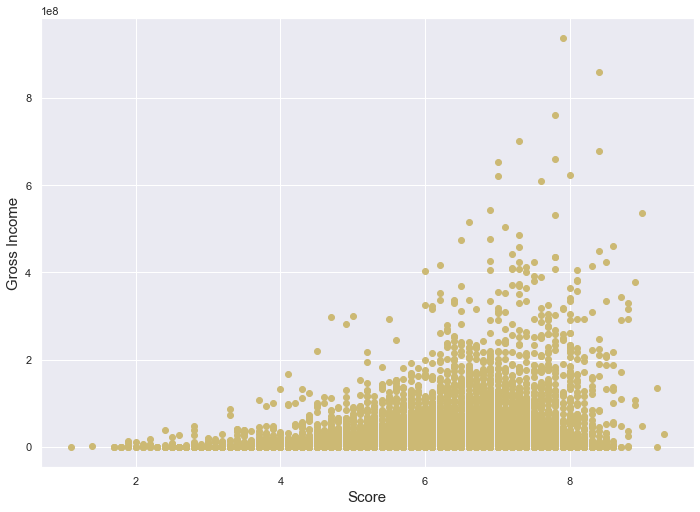

In [15]:
x=df['score'].values
y=df['usa_gross_income'].values
plt.scatter(x,y,
            c='y',
            label='Data points')
plt.xlabel('Score', size=15)
plt.ylabel('Gross Income', size=15)
plt.show()

##### Conclusión: Aquí tampoco encontramos relación en la gráfica, es decir, no parece que se genere una línea con los puntos graficados.

Al generar un modelo de regresión lineal, vemos que la R cuadrada del modelo, es un número muy chico y por lo tanto, sabemos que no es un buen modelo para predecir la variable.

In [16]:
import statsmodels.api as sm

model = sm.OLS.from_formula('y~x', #y = b0 + b1*x 
                            data=df)
result=model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     432.9
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           7.91e-95
Time:                        16:34:58   Log-Likelihood:            -2.9268e+05
No. Observations:               15326   AIC:                         5.854e+05
Df Residuals:                   15324   BIC:                         5.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.002e+07   2.41e+06    -12.453      0.0

## Gráficos de los datos

### ¿Cuáles son los géneros de películas que más se producen?

Para contestar esta pregunta, decidí utilizar un pie chart para visualizar los datos.

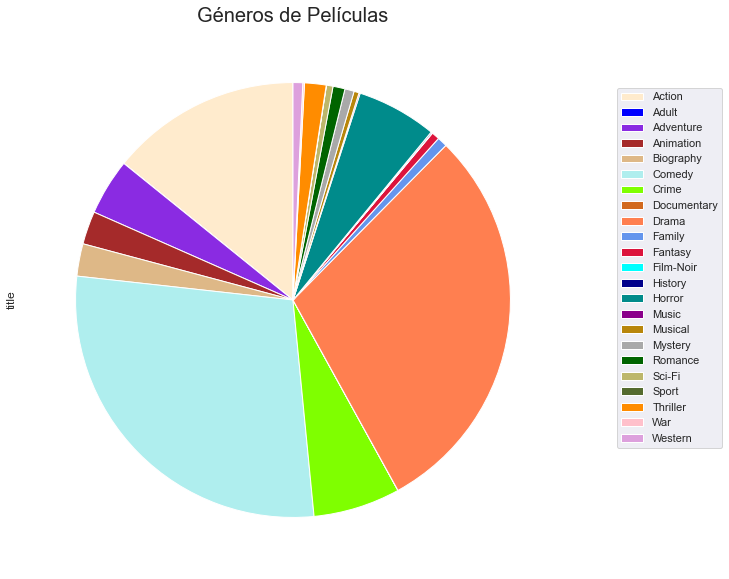

In [17]:

new_df = df.groupby('genre',
                    axis=0).count()

colors = ['BlanchedAlmond', 'Blue', 'BlueViolet', 'Brown', 'Burlywood', 
          'PaleTurquoise', 'Chartreuse', 'Chocolate', 'Coral', 'CornflowerBlue', 
          'Crimson', 'Cyan',  'DarkBlue', 'DarkCyan', 'DarkMagenta', 'DarkGoldenrod', 
          'DarkGray', 'DarkGreen', 'DarkKhaki', 'DarkOliveGreen', 'DarkOrange', 'Pink', 'Plum']

new_df['title'].plot(kind = 'pie',
                     figsize = (20, 10),
                     labeldistance=None,
                     startangle=90,
                     colors = colors)
#poner labels para que se entienda que es cada cosa creo que es con un parameter llamado labels buscalo
plt.legend(loc='best', bbox_to_anchor=(1.3, 0.9))
plt.rcParams['patch.linewidth'] = 2
plt.title('Géneros de Películas', size=20)
plt.show()

Generé un gráfico de pastel para ver un aproximado del porcentaje de cada género, sin embargo, son muchos géneros, por lo que preferí generar una gráfica de barras de los 10 principales.

Se acomodaron de mayor a menor, por cantidad de película en cada género y se graficaron los Top 10 (los primeros 10).

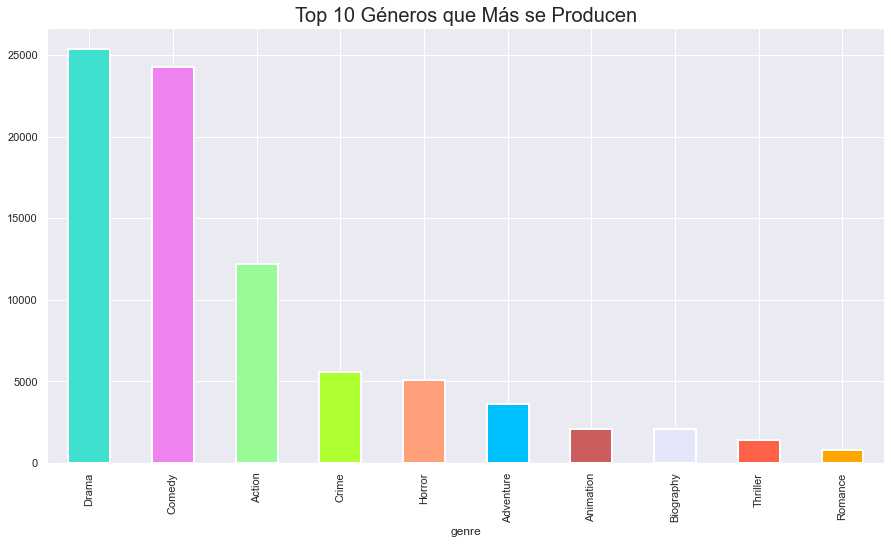

In [18]:
new_df.sort_values(['title'],
                   ascending=False,
                   axis=0,
                   inplace=True)
colors = ['Turquoise', 'Violet', 'PaleGreen', 'GreenYellow', 'LightSalmon',
         'DeepSkyBlue', 'IndianRed', 'Lavender', 'Tomato', 'Orange']

top10genres=new_df.head(10)
top10genres['title'].plot(kind='bar',
                    figsize=(15,8),
                          color = colors)
plt.title('Top 10 Géneros que Más se Producen', size=20)
plt.show()


##### Conclusión: Los géneros de películas que más se producen son Drama, Comedia, Acción, Crimen, Terror (horror), Aventura, Animadas, Biografías, Thrillers y Romance, especialmente Drama y Comedia, tienen un número muy elevado de películas producidas.

### ¿En qué países se producen más películas?

Se siguió el mismo proceso para generar esta gráfica de barras horizontal:
Se ordenaron los datos de mayor a menor, según el número de películas que se produjo en cada país y se obtuvo el resultado de la siguiente gráfica.

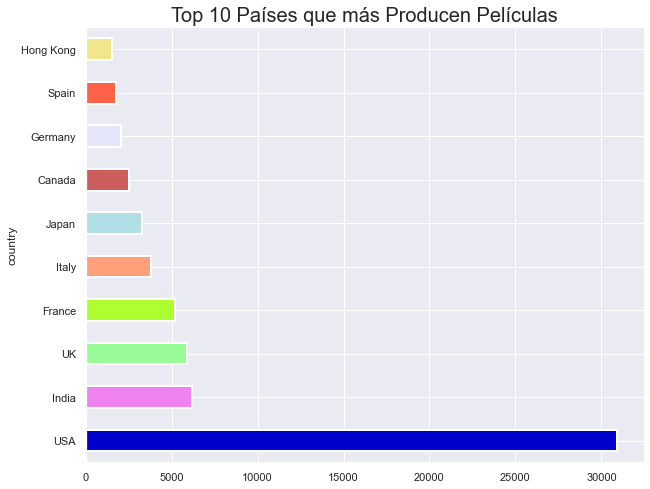

In [19]:
countrydf = df.groupby('country',
                       axis=0).count()

colors = ['MediumBlue', 'Violet', 'PaleGreen', 'GreenYellow', 'LightSalmon',
         'PowderBlue', 'IndianRed', 'Lavender', 'Tomato', 'Khaki']

countrydf.sort_values(['title'],
                      ascending=False,
                      axis=0,
                      inplace=True)

top10countries = countrydf.head(10)
top10countries['title'].plot(kind='barh',
                    figsize=(10,8),
                    color = colors)
plt.title('Top 10 Países que más Producen Películas', size=20)
plt.show()


##### Conclusión: Los países en los que más se producen películas son Estados Unidos, India, Reino Unido, Francia, Italia, Japón, Canadá, Alemania, España y Hong Kong. De igual manera concluyo que el país en el que más se producen películas es Estados Unidos, teniendo una cantidad muy por encima de los demás en cuanto a la producción de películas, esto tiene sentido, tomando en cuenta que en este país se encuentra Hollywood. El segundo lugar, India, tampoco es sorpresa ya que en India se encuentra Bollywood.

### ¿Qué género tiene los mejores scores o calificaciones?

También se quería conocer los géneros que tiene mejores Scores o Calificaciones, es decir cuáles son los géneros que más les gustan a las personas y para esto, se ordenaron los datos de mayor a menor de acuerdo a la calificación y se graficó la lista de los primeros 10.

In [20]:
calif = df.groupby('genre', axis=0).mean()

calif.sort_values(['score'],
                      ascending=False,
                      axis=0,
                      inplace=True)
top10calif = calif['score'].head(10)

Text(0.5, 1.0, 'Top 10 Géneros con Mejores Calificaciones (scores)')

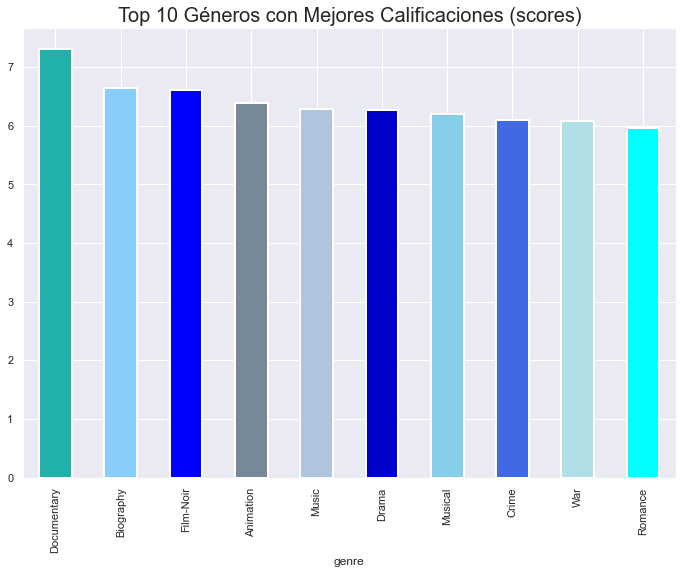

In [21]:
colors = ['LightSeaGreen', 'LightSkyBlue', 'Blue', 'LightSlateGrey', 'LightSteelBlue','MediumBlue',
         'SkyBlue', 'RoyalBlue', 'PowderBlue', 'Cyan']
top10calif.plot(kind='bar', color = colors)
plt.title('Top 10 Géneros con Mejores Calificaciones (scores)', size=20)

##### Conclusión: se produjo, la gráfica anterior y se puede concluir que los géneros que tienen mejores calificaciones son: Documentales, Biografías, "Cine Negro" o Film Noir, Animación, Música, Drama, Crimen, Guerra y Romance, sin embargo, las diferencias entre cada categoría no son tan exageradas como en las anteriores y vemos que incluso el género que tiene mayor calificación o rating, no llega a tener un valor de 8.

### ¿Cuáles son las películas que más ingresos han generado en los Estados Unidos?

Se ordenó el dataframe de acuerdo a la variable usa_gross_income de mayor a menor para luego poder obtener los primeros 10 renglones de esos datos y poder generar una gráfica de barras con los títulos de las películas que han generado mayores ingresos en los Estados Unidos

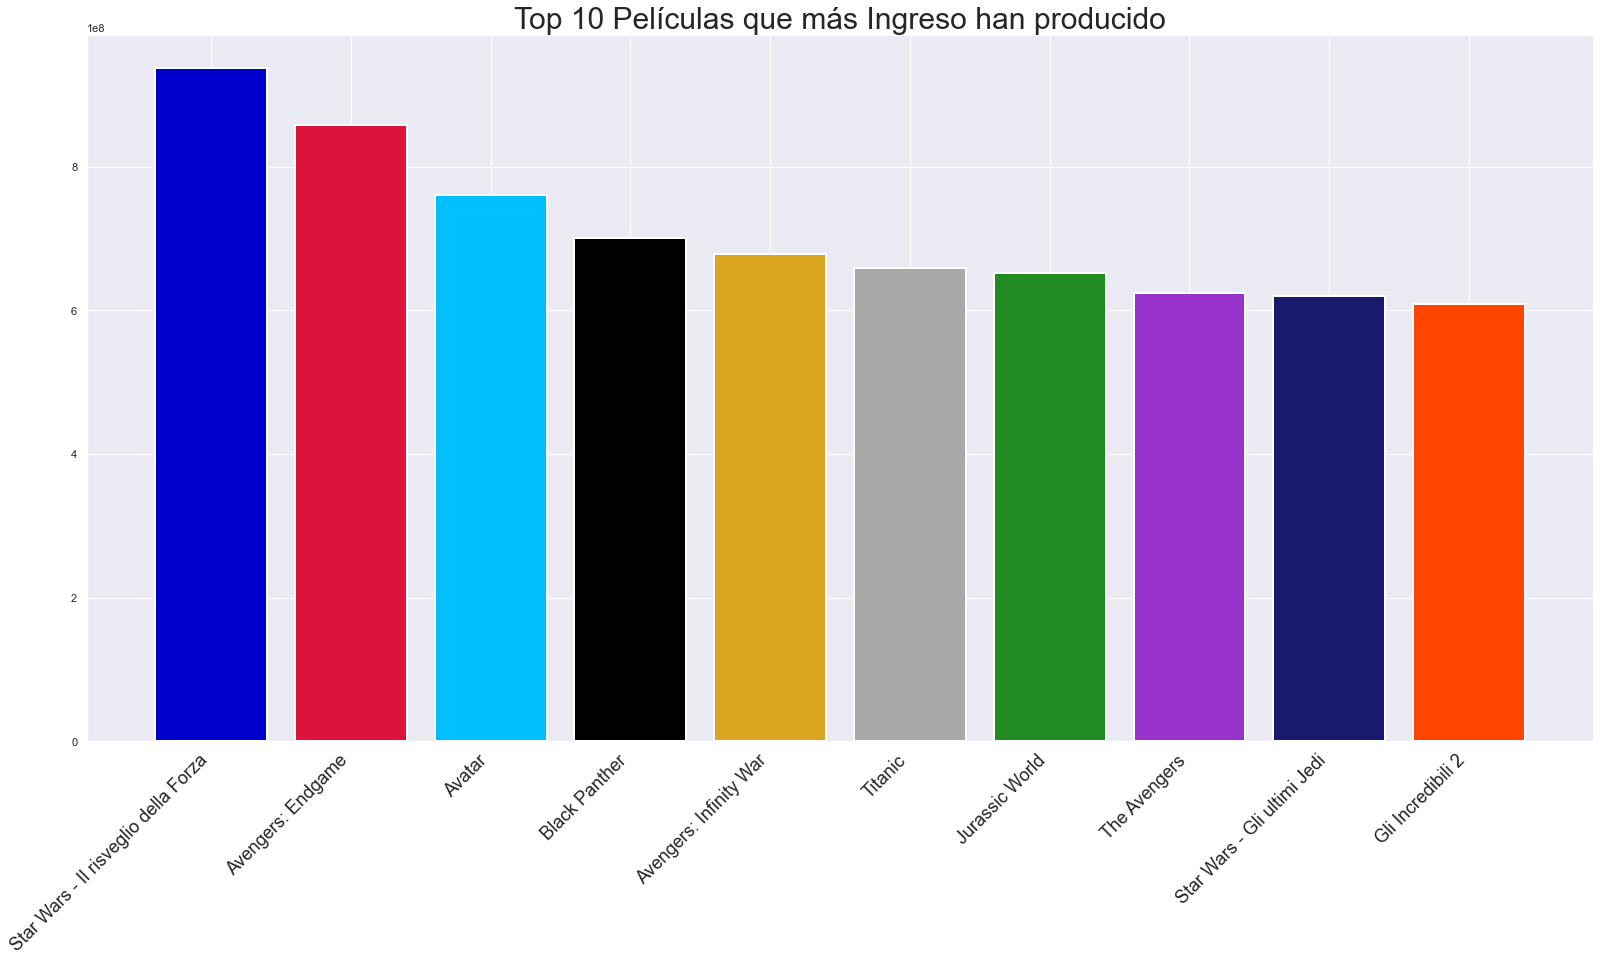

In [22]:
toppelis = df

toppelis.sort_values(['usa_gross_income'],
                      ascending=False,
                      axis=0,
                      inplace=True)
toppelis
toppelis10 = toppelis.head(10)
toppelis10
x = list(toppelis10['title'])
y = toppelis10['usa_gross_income']
x_pos = np.arange(len(x))

colors = ['MediumBlue', 'Crimson', 'DeepSkyBlue', 'Black', 'Goldenrod', 'DarkGray', 'ForestGreen', 'DarkOrchid', 
          'MidnightBlue', 'OrangeRed']

plt.figure(figsize=(27, 13))
plt.bar(x_pos, y, color = colors)
plt.xticks(x_pos, x, size=18, rotation=45, ha="right")
plt.title('Top 10 Películas que más Ingreso han producido', size=30)
plt.show()

##### Conclusión: Un punto de coincidencia entre la mayoría de las películas que se encuentran en la gráfica anterior es que pertenecen a franquicias muy populares como la franquicia de Star Wars, Marvel (Avengers: Endgame, Avatar, Avengers: Infinity War) o Jurassic Park (en este caso Jurassic World) y su popularidad se refleja en los ingresos que han generado en los Estados Unidos.

## Stakeholders

Algunas empresas que estaría interesada en todos estos datos son empresas como Disney, DreamWorks, 20th Century Fox, Paramount Pictures etc... todas las productoras audiovisuales están interesadas en conocer este tipo de estadísticas, ya que les sería útil conocer cuáles son los géneros que mayores ingresos generan, en qué países conviene producirlas, cuáles son las películas que más les gustan a las personas, todo esto para que con base en esta información puedan planear su producción de películas. 

Además un sector de la sociedad que estaría interesado en conocer esta información, son todos los cinéfilos y amantes del cine, que se interesan por estar informados de este tipo de estadísticas.

## Conclusión General

Después de analizar esta base de datos de Películas, llegué a la conclusión de que en los últimos años, especialmente a partir de los años 2000s se ha generado un crecimiento exponencial en la cantidad de películas producidas. Estas películas han sido de muchos diferentes géneros, pero los 5 principales que se han producido son Drama, Comedia, Acción, Crimen y Terror (horror). También sabemos que se producen películas en muchos diferentes países, no obstante la gran mayoría se generan en 2 países: Estados Unidos e India, pues ahí se encuentran las grandes industrias de cine Hollywood y Bollywood. De igual manera, llegué a la conclusión de que en general, las películas que más ingresos generan son aquellas que pertenecen a franquicias cinematográficas como Star Wars y Marvel.

Por otra parte, al buscar relaciones entre las variables, llegué a la conclusión de que no existe alguna relación entre el presupuesto que designan a las películas y la calificación o  score (rating) que obtuvieron, así como tampoco existe una relación entre los ingresos que genera una película y la calificación obtenida. 